In [10]:
using Plots

In [15]:
"""
Compute the divided difference tables to get the Newton coefficients.
This function stores the whole table for pedagogical reasons, not
a good general purpose implementation.

The final set of coefficients to use are those on the diagonal
"""
function compute_newton_coeffs(xi,fi)
    npts = length(xi)
    T = zeros(npts,npts)
    T[:,1] = fi # the first column becomes fi.
    for j=2:npts
        for i=j:npts
            # the value in the table is
            # made by looking left (i,j-1) and left-up (i-1,j-1)
            # divided by the region x_i - ...
            T[i,j] = (T[i,j-1] - T[i-1,j-1])/(xi[i] - xi[i-j+1])
        end
    end
    return T
end

# This is the example from Gautschi, page 96
# f(x) = 3+x^2
xi = [0., 1., 2., 4., 8. ]
fi = [3., 4., 7., 19., 67.]
compute_newton_coeffs(xi,fi)

5×5 Array{Float64,2}:
  3.0   0.0  0.0  0.0  0.0
  4.0   1.0  0.0  0.0  0.0
  7.0   3.0  1.0  0.0  0.0
 19.0   6.0  1.0  0.0  0.0
 67.0  12.0  1.0  0.0  0.0

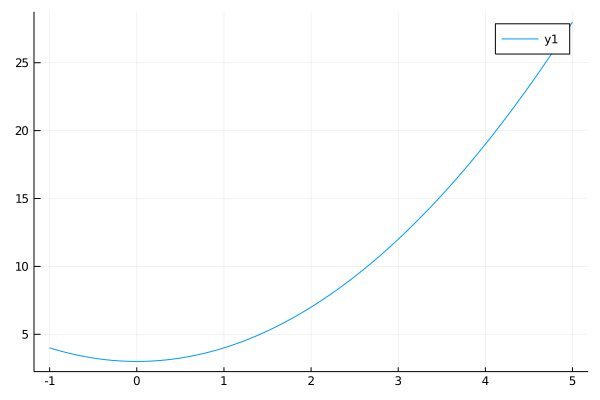

In [5]:
function newton_interp(xx,xi,fi)
    T = compute_newton_coeffs(xi,fi)
    xv = ones(size(xx))
    f = T[1,1] .* xv
    for i=2:size(T,1)
        xv = xv .* (xx .- xi[i-1])
        f += T[i,i] * xv
    end
    f
end

# Reuse the same example
xx = collect(range(-1.,stop=5.,length=100));
plot(xx,newton_interp(xx,xi,fi))

The next scenario is fun because it's reflective of what might happen in an experiment. 

In [21]:
fun(x) = 3 .+ 0.5*x.^2 .+ exp.(-x)
h = 0.000001
#xi = [1.;2 .+ collect(range(0.,stop=0.00001,length=3)); 3.; 4.; ]
xi = [1.;2 .+ collect(range(0.,stop=h,length=3)); 3.; 4.; ]
fi = fun(xi)
@show xi
T = compute_newton_coeffs(xi,fi)

xi = [1.0, 2.0, 2.0000005, 2.000001, 3.0, 4.0]


6×6 Array{Float64,2}:
  3.86788  0.0      0.0        0.0        0.0          0.0
  5.13534  1.26746  0.0        0.0        0.0          0.0
  5.13534  1.86467  0.597209   0.0        0.0          0.0
  5.13534  1.86467  0.566658  -0.030551   0.0          0.0
  7.54979  2.41445  0.549787  -0.0168708  0.0068401    0.0
 11.0183   3.46853  0.527038  -0.0113743  0.00274823  -0.00136396

As the points get closer (i.e. change h above from 0.1 to 0.00001), the entries in the table become the same (to a few decimal points. We will see that these points actually become the derivatives! 

In [22]:
# What is the derivative of $fun(x) at x=2$?
fprime = 2-exp(-2)

1.8646647167633872

In [23]:
T[3,2]

1.8646650016998358

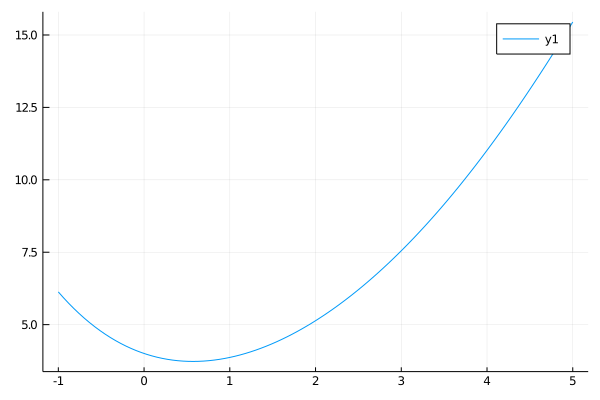

In [24]:
plot(xx,newton_interp(xx,xi,fi))